# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
# Your code here
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston


Bad key "text.kerning_factor" on line 4 in
C:\Users\joaop\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
boston_data=pd.read_csv("boston_data.csv")
boston_data.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [3]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [4]:
#since this is a package included in sklearn we can also import it

boston_data=load_boston()
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
y=pd.DataFrame(boston_data['target'])
x=pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

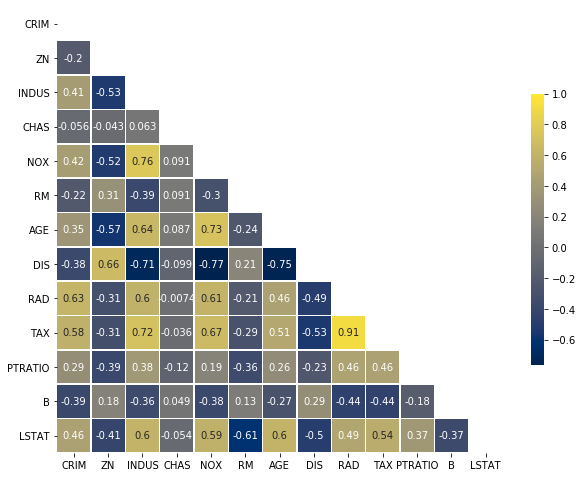

In [6]:
# Your plots here
corr=x.corr()

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr, cmap='cividis')

plt.show()

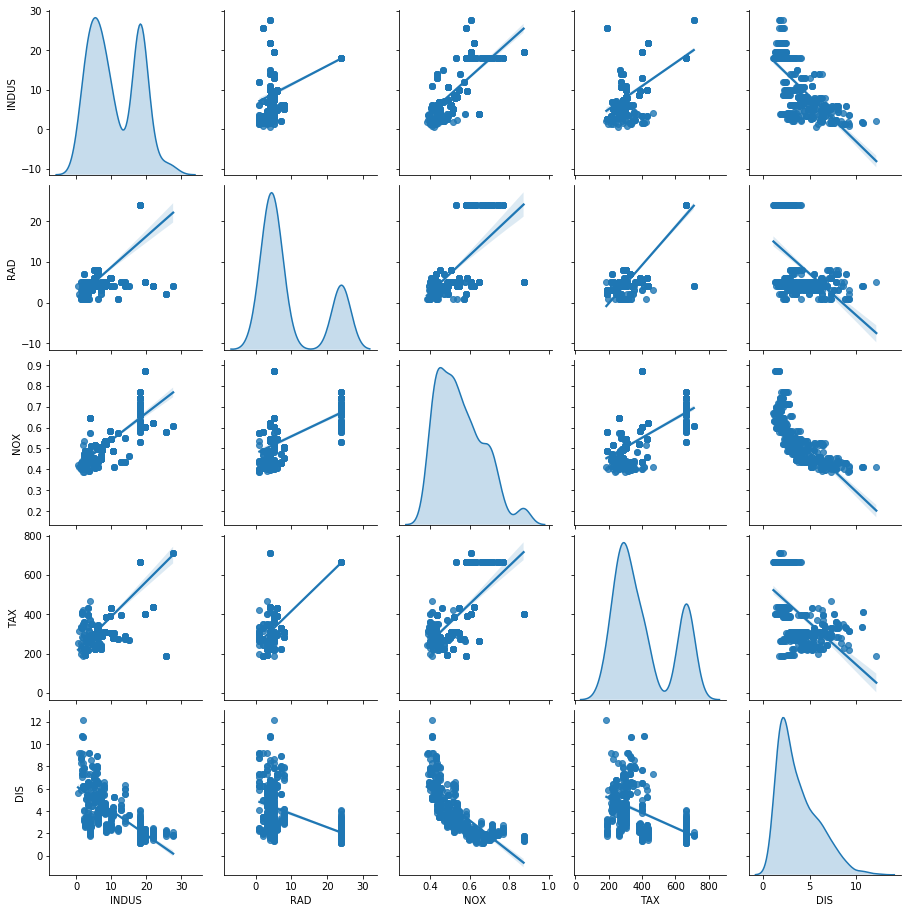

In [7]:
sns.pairplot(data=x, vars=["INDUS", "RAD", "NOX", "TAX", "DIS"], palette="Greys", corner=False, diag_kind="kde",kind="reg")

In [8]:
'''
𝓜𝔂 𝓪𝓷𝓼𝔀𝓮𝓻𝓼...

The variables 'indus', 'rad' and 'nox' seem to have a high collinearity.
'''

"\n𝓜𝔂 𝓪𝓷𝓼𝔀𝓮𝓻𝓼...\n\nThe variables 'indus', 'rad' and 'nox' seem to have a high collinearity.\n"

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [9]:
# Your response here.
'''
𝓜𝔂 𝓪𝓷𝓼𝔀𝓮𝓻𝓼...

𝗔𝘁𝘁𝗿𝗶𝗯𝘂𝘁𝗲 𝗜𝗻𝗳𝗼𝗿𝗺𝗮𝘁𝗶𝗼𝗻 (𝗶𝗻 𝗼𝗿𝗱𝗲𝗿)
        - INDUS    proportion of non-retail business acres per town
        - NOX      nitric oxides concentration (parts per 10 million)
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000

𝕽𝗲𝗹𝗲𝘃𝗮𝗻𝘁 𝗰𝗼𝗿𝗿𝗲𝗹𝗮𝘁𝗶𝗼𝗻𝘀 𝘁𝗼 𝗽𝗼𝗶𝗻𝘁 𝗼𝘂𝘁:
Makes sense that DIS and NOX are closely related, since there's a higher nitric oxides concentration in more non-retail business centres.
The same reasoning applies for INDUS and NOX and INDUS and DIS.

The same maybe doesn't apply to DIS and TAX, which have a inverse relationship.
'''


"\n𝓜𝔂 𝓪𝓷𝓼𝔀𝓮𝓻𝓼...\n\n𝗔𝘁𝘁𝗿𝗶𝗯𝘂𝘁𝗲 𝗜𝗻𝗳𝗼𝗿𝗺𝗮𝘁𝗶𝗼𝗻 (𝗶𝗻 𝗼𝗿𝗱𝗲𝗿)\n        - INDUS    proportion of non-retail business acres per town\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n\n𝕽𝗲𝗹𝗲𝘃𝗮𝗻𝘁 𝗰𝗼𝗿𝗿𝗲𝗹𝗮𝘁𝗶𝗼𝗻𝘀 𝘁𝗼 𝗽𝗼𝗶𝗻𝘁 𝗼𝘂𝘁:\nMakes sense that DIS and NOX are closely related, since there's a higher nitric oxides concentration in more non-retail business centres.\nThe same reasoning applies for INDUS and NOX and INDUS and DIS.\n\nThe same maybe doesn't apply to DIS and TAX, which have a inverse relationship.\n"

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

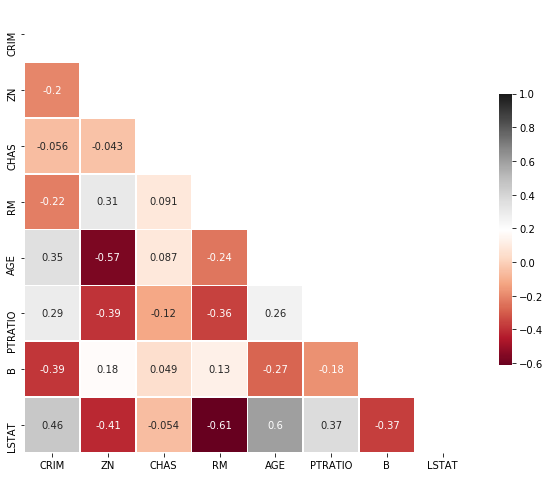

"\n𝓜𝔂 𝓪𝓷𝓼𝔀𝓮𝓻𝓼...\n\n𝗙𝘂𝗿𝘁𝗵𝗲𝗿 𝗿𝗲𝗹𝗲𝘃𝗮𝗻𝘁 𝗰𝗼𝗿𝗿𝗲𝗹𝗮𝘁𝗶𝗼𝗻𝘀 𝘁𝗼 𝗽𝗼𝗶𝗻𝘁 𝗼𝘂𝘁:\nAGE, ZN - corr -𝟬.𝟱𝟳: makes sense that there's a 𝗵𝗶𝗴𝗵𝗲𝗿 𝗶𝗻𝘃𝗲𝗿𝘀𝗲 𝗿𝗲𝗹 between proportion of residential land zoned for lots over 25,000 sq.ft. and proportion of owner-occupied units built prior to 1940\nLSTAT, RM - corr -𝟬.𝟲𝟭: makes sense that there tends to be a 𝗵𝗶𝗴𝗵𝗲𝗿 𝗶𝗻𝘃𝗲𝗿𝘀𝗲 𝗿𝗲𝗹 in # of rooms per dwelling in places w higher % lower status of the population\nLSTAT, AGE - corr +𝟬.𝟲: makes sense that there are older buildings in place with w higher % 𝗹𝗼𝘄𝗲𝗿 𝘀𝘁𝗮𝘁𝘂𝘀 of the population\nLSTAT, CRIM - corr +𝟬.𝟰𝟲: makes sense that there tends to be 𝗵𝗶𝗴𝗵𝗲𝗿 𝗰𝗿𝗶𝗺𝗶𝗻𝗮𝗹𝗶𝘁𝘆 in places w higher % 𝗹𝗼𝘄𝗲𝗿 𝘀𝘁𝗮𝘁𝘂𝘀 of the population\n\n𝗔𝘁𝘁𝗿𝗶𝗯𝘂𝘁𝗲 𝗜𝗻𝗳𝗼𝗿𝗺𝗮𝘁𝗶𝗼𝗻 (𝗶𝗻 𝗼𝗿𝗱𝗲𝗿):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - B  

In [10]:
# Your response here

remaining_vars=x.drop(labels=["INDUS", "RAD", "NOX", "TAX", "DIS"],axis=1)

corr=remaining_vars.corr()

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr, cmap='RdGy')

plt.show()

'''
𝓜𝔂 𝓪𝓷𝓼𝔀𝓮𝓻𝓼...

𝗙𝘂𝗿𝘁𝗵𝗲𝗿 𝗿𝗲𝗹𝗲𝘃𝗮𝗻𝘁 𝗰𝗼𝗿𝗿𝗲𝗹𝗮𝘁𝗶𝗼𝗻𝘀 𝘁𝗼 𝗽𝗼𝗶𝗻𝘁 𝗼𝘂𝘁:
AGE, ZN - corr -𝟬.𝟱𝟳: makes sense that there's a 𝗵𝗶𝗴𝗵𝗲𝗿 𝗶𝗻𝘃𝗲𝗿𝘀𝗲 𝗿𝗲𝗹 between proportion of residential land zoned for lots over 25,000 sq.ft. and proportion of owner-occupied units built prior to 1940
LSTAT, RM - corr -𝟬.𝟲𝟭: makes sense that there tends to be a 𝗵𝗶𝗴𝗵𝗲𝗿 𝗶𝗻𝘃𝗲𝗿𝘀𝗲 𝗿𝗲𝗹 in # of rooms per dwelling in places w higher % lower status of the population
LSTAT, AGE - corr +𝟬.𝟲: makes sense that there are older buildings in place with w higher % 𝗹𝗼𝘄𝗲𝗿 𝘀𝘁𝗮𝘁𝘂𝘀 of the population
LSTAT, CRIM - corr +𝟬.𝟰𝟲: makes sense that there tends to be 𝗵𝗶𝗴𝗵𝗲𝗿 𝗰𝗿𝗶𝗺𝗶𝗻𝗮𝗹𝗶𝘁𝘆 in places w higher % 𝗹𝗼𝘄𝗲𝗿 𝘀𝘁𝗮𝘁𝘂𝘀 of the population

𝗔𝘁𝘁𝗿𝗶𝗯𝘂𝘁𝗲 𝗜𝗻𝗳𝗼𝗿𝗺𝗮𝘁𝗶𝗼𝗻 (𝗶𝗻 𝗼𝗿𝗱𝗲𝗿):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
'''

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [11]:
# Your code here
print("Descriptive stats of housing price",y.describe())

Descriptive stats of housing price                 0
count  506.000000
mean    22.532806
std      9.197104
min      5.000000
25%     17.025000
50%     21.200000
75%     25.000000
max     50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [12]:
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    '''
    best ones are r2score, classification_report(y_true, y_predict) and roc_curve(y_true, y_predict)
    '''
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [13]:
# Your code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(x, y, train_size=0.8, shuffle=True, random_state=20)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [14]:
# Five separate RFR here with the given max depths

from sklearn.ensemble import RandomForestRegressor

max_depths=[2,4,6,8,10]

models_train=[]
models_test=[]

for depth in max_depths:
    '''
    computing the various models and appending them in a list entitled 'models'
    '''
    model=RandomForestRegressor( #model with depth 
    n_estimators=100,
    criterion='mse',
    max_depth=depth
    )
    models_train.append(model.fit(X_train, y_train))
    models_test.append(model.fit(X_test, y_test))

C:\Users\joaop\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\joaop\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\joaop\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\joaop\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\joaop\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vec

Now, plot the score for each tree on the training set and on the testing set.

In [15]:
# Produce a plot with the score for the testing and training for the different max depths

counter=0
max_depths=[2,4,6,8,10]

training_scores=[] #list to append the training scores
test_scores=[] #list to append the testing scores

for blackbox in models_train:
    y_pred=blackbox.predict(X_train)
    training_scores.append(performance_metric(y_pred, y_train))
    
for blackbox in models_test:
    y_pred=blackbox.predict(X_test)
    test_scores.append(performance_metric(y_pred, y_test))

print("train scores:",training_scores)
print("test scores:",training_scores)

train scores: [0.4259578202712765, 0.5997366806691693, 0.6265535139941967, 0.6489391869485601, 0.6712484179092343]
test scores: [0.4259578202712765, 0.5997366806691693, 0.6265535139941967, 0.6489391869485601, 0.6712484179092343]


Text(0.5, 1.0, 'R Squared \nNote: Red = training_scores ; Blue = test scores')

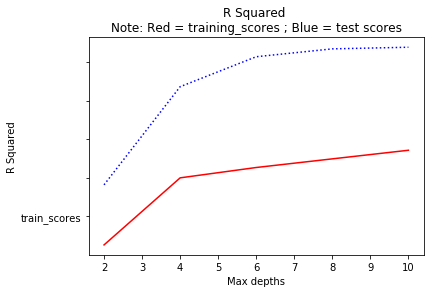

In [16]:
fig=plt.figure()
ax=fig.add_subplot(111)
 
ax.plot(max_depths,training_scores,c='r',label='Training scores',fillstyle='none')
ax.plot(max_depths,test_scores,c='b',label='Test scores', ls=":")
ax.set_ylabel(ylabel='R Squared')
ax.set_yticklabels(['test_scores_scores','train_scores'])
ax.set_xlabel(xlabel='Max depths')
ax.set_title('''R Squared 
Note: Red = training_scores ; Blue = test scores''')

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [17]:
# Your response here
'''The bigger the depth of the tree, better tend to be the performance.'''

'The bigger the depth of the tree, better tend to be the performance.'

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [18]:
# Your response here

'''
I would say w 𝕕𝕖𝕡𝕥𝕙 𝟙 it suffers from 𝕙𝕚𝕘𝕙 𝕓𝕚𝕒𝕤 whereas from d̲e̲p̲t̲h̲ ̲1̲0̲ it suffers from h̲i̲g̲h̲ ̲v̲a̲r̲i̲a̲n̲c̲e̲.
The bigger the tree's depth, the likelier it is to overfit (low bias, high variance).
The inverse reasoning happens when we decrease the trees depth (high bias, low variance).
'''

"\nI would say w 𝕕𝕖𝕡𝕥𝕙 𝟙 it suffers from 𝕙𝕚𝕘𝕙 𝕓𝕚𝕒𝕤 whereas from d̲e̲p̲t̲h̲ ̲1̲0̲ it suffers from h̲i̲g̲h̲ ̲v̲a̲r̲i̲a̲n̲c̲e̲.\nThe bigger the tree's depth, the likelier it is to overfit (low bias, high variance).\nThe inverse reasoning happens when we decrease the trees depth (high bias, low variance).\n"

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

Text(0.5, 1.0, 'Red = training_scores ; Blue = test scores')

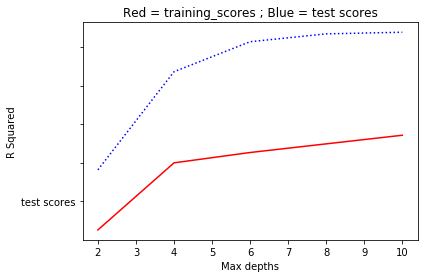

In [19]:
# Your response here
fig=plt.figure()
ax=fig.add_subplot(111)
 
ax.plot(max_depths,training_scores,c='r',label='Training scores',fillstyle='none')
ax.plot(max_depths,test_scores,c='b',label='Test scores', ls=":")
ax.set_ylabel(ylabel='R Squared')
ax.set_yticklabels(['train_scores','test scores'])
ax.set_xlabel(xlabel='Max depths')
ax.set_title("Red = training_scores ; Blue = test scores")

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [20]:
# Your response here
'''
Q1:How relevant today is data that was collected from 1978?
It will be irrelevant in many cases. The scales will be differente, there will be other factors (Features in ML language)
that may have way more relevance.

Q2:Are the features present in the data sufficient to describe a home?
Not at all. There are more features to be taken into account:
-public transportation accessibility besides rail way (e.g. subway, bus, etc.);
-noise pollution (e.g. if its near an airport or some other relevant source of noise);
-the likelihood of the legal standing of the property
-the age, style and condition of home appliances
-size of the lot

Q3:Is the model robust enough to make consistent predictions?
I wouldn't say so.The R Squareds are low. It may be underfitting due to the lack of data: 503 instances.

Q4:Would data collected in an urban city like Boston be applicable in a rural city?
No. Many of these factors are exclusive to urban cities or make more sense in this case...

'''

"\nQ1:How relevant today is data that was collected from 1978?\nIt will be irrelevant in many cases. The scales will be differente, there will be other factors (Features in ML language)\nthat may have way more relevance.\n\nQ2:Are the features present in the data sufficient to describe a home?\nNot at all. There are more features to be taken into account:\n-public transportation accessibility besides rail way (e.g. subway, bus, etc.);\n-noise pollution (e.g. if its near an airport or some other relevant source of noise);\n-the likelihood of the legal standing of the property\n-the age, style and condition of home appliances\n-size of the lot\n\nQ3:Is the model robust enough to make consistent predictions?\nI wouldn't say so.The R Squareds are low. It may be underfitting due to the lack of data: 503 instances.\n\nQ4:Would data collected in an urban city like Boston be applicable in a rural city?\nNo. Many of these factors are exclusive to urban cities or make more sense in this case...\